# Task 2: Spam Detection using MultinomialNB

- Load a text dataset (e.g., SMS Spam Collection or any public text 
dataset). 
- Preprocess using CountVectorizer or TfidfVectorizer. 
- Train a MultinomialNB classifier. 
- Evaluate: 
    - Accuracy 
    - Precision 
    - Recall 
    - Confusion Matrix 

In [41]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

import seaborn as sns

In [77]:
# Load SMS Spam Collection dataset from https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
# took only first 2 column of dataset
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1','v2']]

# rename the column from v1 v2 to label message
df.columns = ['label','message']

# converted ham to 0 and spam to 1
df['label'] = list(map(lambda mess:0 if mess=='ham' else 1,df['label']))

# alternate of above line
# df['label'] = df['label'].map({'ham':0,'spam':1})

df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


    TF-IDF stands for Term Frequency–Inverse Document Frequency.
    It transforms text into numerical features based on how important a word is in a document relative to the entire corpus.
    Stop_words='english' removes common English words like "the", "is", "and", etc., which usually don't carry meaningful information for classification.

In [78]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['message'])

# y has label column in which spam:1 and ham:0
y = df['label']
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 43478 stored elements and shape (5572, 8404)>

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred[:10])
y_test.head(10)

[0 0 0 0 1 0 0 0 0 0]


3245    0
944     0
1044    1
2484    0
812     1
2973    0
2991    0
2942    0
230     0
1181    0
Name: label, dtype: int64

In [80]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.968609865470852
Precision: 1.0
Recall: 0.7666666666666667
Confusion Matrix:
 [[965   0]
 [ 35 115]]


<Axes: >

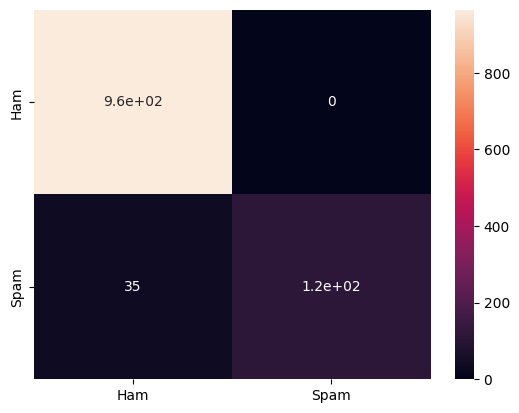

In [81]:
sns.heatmap(conf_matrix , xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'] , annot=True)

## By count Vectorizer

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize text using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['message'])
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model2 = MultinomialNB()
model2.fit(X_train,y_train)

y_pred2 = model2.predict(X_test)

print(y_pred2[:10])
y_test.head(10)

[0 0 1 0 1 0 0 0 0 0]


3245    0
944     0
1044    1
2484    0
812     1
2973    0
2991    0
2942    0
230     0
1181    0
Name: label, dtype: int64

In [75]:
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9802690582959641
Precision: 0.9266666666666666
Recall: 0.9266666666666666
Confusion Matrix:
 [[954  11]
 [ 11 139]]


<Axes: >

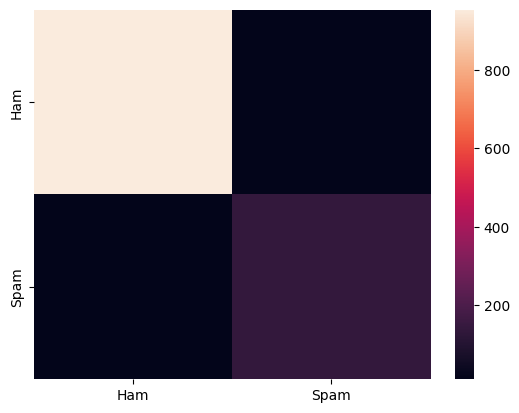

In [76]:
sns.heatmap(conf_matrix,
 xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])